In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
def fit (X, y):
    learning_rate=0.01
    lambda_param=0.01
    n_iters=10000
    b = 0
    w = np.zeros(X.shape[1])
    for i in range(n_iters):
        for index, xi in enumerate(X):
            condition = (np.dot(xi, w) - b) * y[index]   < 1
            if condition:
                b -= learning_rate * y[index]  
                w -= learning_rate * ( 2 * lambda_param * w - np.dot(xi, y[index]))
                 
            else:
                w -=  learning_rate * (2 * lambda_param * w)
                    
    return b, w     
    
    
    

In [3]:
def visualize (X, y ,b ,w):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])
    z0 = -w[0]
    z1 = w[1]

    x1_1 , x1_2 , x1_1_m , x1_2_m , x1_1_p , x1_2_p= (z0 * x0_1 + b ) / z1 , (z0 * x0_2 + b ) / z1 ,  (z0 * x0_1 + b  -1) / z1 , (z0 * x0_2 + b -1) / z1 ,(z0 * x0_1 + b  +1) / z1 , (z0 * x0_2 + b +1) / z1 

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

In [9]:
def accuracy(y_test, y_predict):
    acc = 0 
    for i in range (len(y_test)):
        if y_test[i] == y_predict[i]:
            acc += 1
    print("accuracy is : "  , acc/len(y_test)) 

-13.459999999999757 [-0.95904445 -0.45919427]


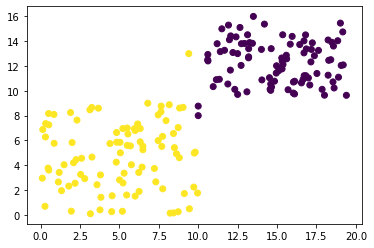

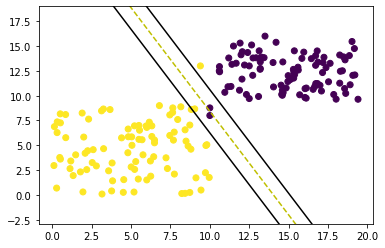

accuracy is :  1.0


In [10]:
if __name__ == "__main__":
    df=pd.read_csv("data1.csv")
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 )
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
    b,w = fit(X_train, y_train)
    print(b ,w)
    visualize (X_train, y_train , b, w)
    y_predict = np.sign(np.dot(X_test, w) - b)
    accuracy(y_test, y_predict)
    

-0.060000000000000005 [0.8638463  0.52621122]


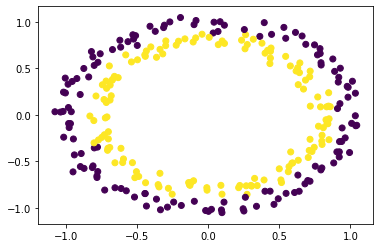

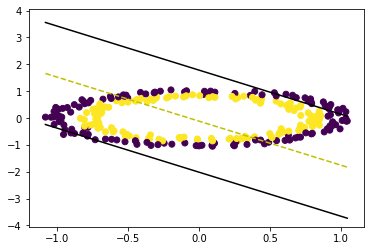

accuracy is :  0.3333333333333333


In [16]:
if __name__ == "__main__":
    learning_rate=0.01
    lambda_param=0.01
    n_iters=10000
    df=pd.read_csv("data2.csv")
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 )
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
    b,w = fit(X_train, y_train)
    print(b ,w)
    visualize (X_train, y_train , b, w)
    y_predict = np.sign(np.dot(X_test, w) - b)
    accuracy(y_test, y_predict)

In [24]:



# class SVM:
#     def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=10000):
#         self.lr = learning_rate
#         self.lambda_param = lambda_param
#         self.n_iters = n_iters
#         self.w = None
#         self.b = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape

#         y_ = np.where(y <= 0, -1, 1)

#         self.w = np.zeros(n_features)
#         self.b = 0

#         for _ in range(self.n_iters):
#             for idx, x_i in enumerate(X):
#                 condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
#                 if condition:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w)
#                 else:
#                     self.w -= self.lr * (
#                         2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
#                     )
#                     self.b -= self.lr * y_[idx]

#     def predict(self, X):
#         approx = np.dot(X, self.w) - self.b
#         return np.sign(approx)
    

In [25]:
# def visualize_svm(X,y,clfw,clfb):
#         def get_hyperplane_value(x, w, b, offset):
#             return (-w[0] * x + b + offset) / w[1]

#         fig = plt.figure()
#         ax = fig.add_subplot(1, 1, 1)
#         plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

#         x0_1 = np.amin(X[:, 0])
#         x0_2 = np.amax(X[:, 0])

#         x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
#         x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

#         x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
#         x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

#         x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
#         x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

#         ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
#         ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
#         ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

#         x1_min = np.amin(X[:, 1])
#         x1_max = np.amax(X[:, 1])
#         ax.set_ylim([x1_min - 3, x1_max + 3])

#         plt.show()

In [26]:
# def accuracy(y_test, y_predict):
#     acc = 0 
#     for i in range (len(y_test)):
#         if y_test[i] == y_predict[i]:
#             acc += 1
#     print(acc/len(y_test)) 

[-1.07286038 -0.24243218] -13.229999999999762


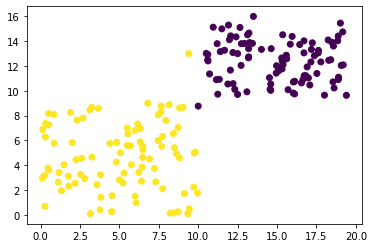

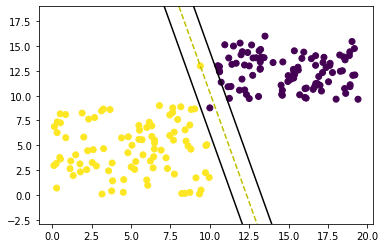

0.9545454545454546


In [27]:
# if __name__ == "__main__":
#     df=pd.read_csv("data1.csv")
#     X = df.drop('Class', axis=1)
#     y = df['Class']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 , random_state=42)
#     X_train = X_train.to_numpy()
#     X_test = X_test.to_numpy()
#     y_train = np.where(y_train == 0, -1, 1)
#     y_test = np.where(y_test == 0, -1, 1)
#     plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
#     clf = SVM()
#     clf.fit(X_train, y_train)
#     print(clf.w, clf.b)
#     visualize_svm(X_train,y_train,clf.w,clf.b)
#     y_predict = clf.predict(X_test)
#     accuracy(y_test, y_predict)
    

[-0.02833268  0.3863475 ] -0.6600000000000004


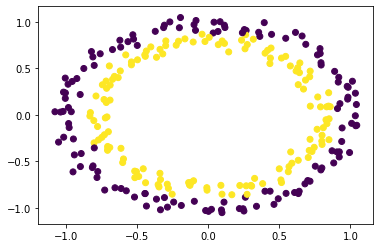

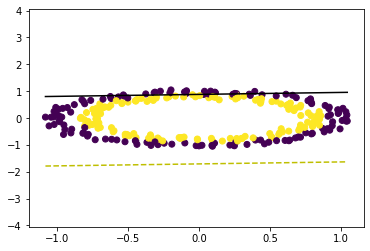

0.4666666666666667


In [186]:
# if __name__ == "__main__":
#     df=pd.read_csv("data2.csv")
#     X = df.drop('Class', axis=1)
#     y = df['Class']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#     X_train = X_train.to_numpy()
#     X_test = X_test.to_numpy()
#     y_train = np.where(y_train == 0, -1, 1)
#     y_test = np.where(y_test == 0, -1, 1)
#     plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
#     clf = SVM()
#     clf.fit(X_train, y_train)
#     print(clf.w, clf.b)
#     visualize_svm(X_train,y_train,clf.w,clf.b)
#     y_predict = clf.predict(X_test)
#     accuracy(y_test, y_predict)